# Template for hand-in on private clustering

Advanced Topics in Machine Learning, U. Copenhagen, fall 2023

Created by Rasmus Pagh

# Fetch and load dataset

The dataset consists of 3414 embedding vectors for first names from the GloVe dataset. Each vector is a 100-dimensional unit vector.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

!curl -s https://rasmuspagh.net/data/glove.twitter.27B.100d.names.pickle -O
input_file = "glove.twitter.27B.100d.names.pickle"
with open(input_file, 'rb') as f:
    embedding = pickle.load(f)
names = list(embedding.keys())
points = np.array([ embedding[x] for x in names ])
n, d = points.shape

# Non-private implementation of cost computation and k-means algorithm

In [2]:
def compute_cost(points, centers):
    distances_squared = np.sum((points - centers[:,np.newaxis])**2, axis=-1)
    return np.mean(np.min(distances_squared, axis=0))


def k_means(points, k, t):
    initial_assignment = np.random.choice(range(k), n)
    cluster_indexes = [ (initial_assignment == i) for i in range(k) ]
    cluster_sizes = [ cluster_indexes[i].sum() for i in range(k) ]

    for l in range(t):
        cluster_sums = [ np.sum(points[cluster_indexes[i]], axis=0) for i in range(k) ]
        centers = np.array([ cluster_sums[i] / max(1, cluster_sizes[i]) for i in range(k) ])
        distances_squared = np.sum((points - centers[:,np.newaxis])**2, axis=-1)
        assignment = np.argmin(distances_squared, axis=0)
        cluster_indexes = [ (assignment == i) for i in range(k) ]
        cluster_sizes = [ cluster_indexes[i].sum() for i in range(k) ]

    return centers

# Plot cost as function of number of iterations

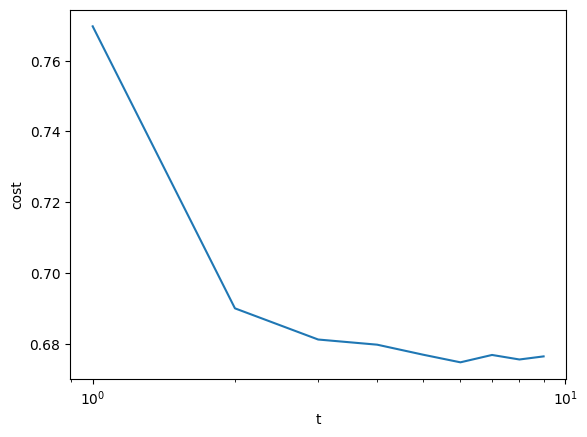

In [5]:
k = 5 # Number of clusters

t_range = range(1,10)
costs = []
for t in t_range: # number of iterations
    centers = k_mean k, t)
    costs.append(compute_cost(points, centers))s(points,

fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('cost')
ax.plot(t_range, costs)
plt.xscale('log')
plt.show()


In [38]:

def private_k_means(points, k, t, p):
    """Private k-means clustering algorithm as described."""
    n, d = points.shape 
    sigma = np.sqrt(3*t/p)  # precompute sigma/sigma'
    # Random initialization of clusters 
    assignment = np.random.choice(range(k), n)
    cluster_indexes = [np.where(assignment == i)[0] for i in range(k)]
    cluster_sizes = [len(cluster_indexes[i]) for i in range(k)] 

    for l in range(t):
        centers = []
        for i in range(k): # Compute the noisy cluster sums
            noisy_sum = np.sum(points[cluster_indexes[i]], axis=0) + np.random.normal(0, sigma, d)
            center = noisy_sum / max(1, cluster_sizes[i]) # added max operation
            centers.append(center)
        centers = np.array(centers)
        distances_squared = np.sum((points[:, np.newaxis] - centers) ** 2, axis=2) 
        assignment = np.argmin(distances_squared, axis=1)
        cluster_indexes = [np.where(assignment == i)[0] for i in range(k)]
        # add noise to the cluster sizes
        cluster_sizes = [len(cluster_indexes[i]) + np.random.normal(0, sigma) for i in range(k)]
    return centers

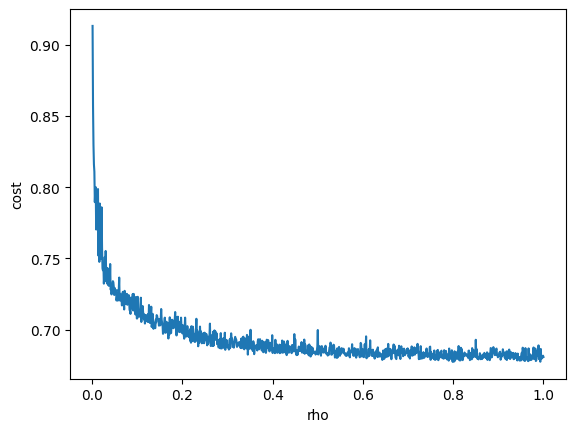

In [40]:
k = 5 # Number of clusters
t = 5
p_range = np.arange(0.001,1.001, 0.001)
costs = []

for p in p_range: # number of iterations
    centers = private_k_means(points,k,t,p)
    costs.append(compute_cost(points, centers)),

fig, ax = plt.subplots()
ax.set_xlabel('rho')
ax.set_ylabel('cost')
ax.plot(p_range, costs)
plt.show()